In [22]:
import random
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [10]:
"""Some algorithms randomly initialize their parameters (sometimes with numpy), and the cross-validation folds are also randomly generated. 
If you need to reproduce your experiments multiple times, you just have to set the seed of the RNG at the beginning of your program:"""

my_seed = 42
random.seed(my_seed)
np.random.seed(my_seed)

### Loading data and preparing data

In [2]:
# Write preprocessed date into a DataFrame
df = pd.read_csv('../data/processed/preprocessed_data_movielens.csv')
df.drop(columns=['title','genres','relevance','tag'], inplace=True)
df = df[['userId', 'movieId', 'rating']]
df.head()

,userId,movieId,rating
0,74244,1,4.0
1,54322,1,4.0
2,106130,1,4.5
3,43484,1,3.5
4,16874,1,4.0


In [3]:
# Load the data into Surprise format, columns have been sorted in required order (raw user id, raw item id, rating) beforehand
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df, reader)

In [11]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

### Defining options

In [12]:
sim_options = {
    'name': 'cosine',
    'user_based': False  # Compute similarities between items
}

### Trying different models

In [13]:
from surprise import KNNBasic

algo = KNNBasic(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Generating Predictions
predictions = algo.test(testset)

# Calculating performance metrics
from surprise import accuracy

mae_knnb = accuracy.mae(predictions, verbose=True)
mse_knnb = accuracy.mse(predictions, verbose=True)
rmse_knnb = accuracy.rmse(predictions, verbose=True)

print(f"Mean Absolute Error (MAE): {mae_knnb:.4f}")
print(f"Mean Square Error (MSE): {mse_knnb:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse_knnb:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7179
MSE: 0.8918
RMSE: 0.9443
Mean Absolute Error (MAE): 0.7179
Mean Square Error (MSE): 0.8918
Root Mean Square Error (RMSE): 0.9443


In [14]:
from surprise import KNNWithMeans

algo = KNNWithMeans(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Generating Predictions
predictions = algo.test(testset)

# Calculating performance metrics
from surprise import accuracy

mae_knnm = accuracy.mae(predictions, verbose=True)
mse_knnm = accuracy.mse(predictions, verbose=True)
rmse_knnm = accuracy.rmse(predictions, verbose=True)

# print(f"Mean Absolute Error (MAE): {mae_knnm:.4f}")
# print(f"Mean Square Error (MSE): {mse_knnm:.4f}")
# print(f"Root Mean Square Error (RMSE): {rmse_knnm:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.6546
MSE: 0.7441
RMSE: 0.8626


In [21]:
from surprise import KNNBaseline

algo = KNNBaseline(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Generating Predictions
predictions = algo.test(testset)

# Calculating performance metrics
from surprise import accuracy

mae_knnbl = accuracy.mae(predictions, verbose=True)
mse_knnbl = accuracy.mse(predictions, verbose=True)
rmse_knnbl = accuracy.rmse(predictions, verbose=True)

# print(f"Mean Absolute Error (MAE): {mae_knnbl:.4f}")
# print(f"Mean Square Error (MSE): {mse_knnbl:.4f}")
# print(f"Root Mean Square Error (RMSE): {rmse_knnbl:.4f}")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.6535
MSE: 0.7424
RMSE: 0.8616


In [37]:
from surprise import KNNWithZScore

algo = KNNWithZScore(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Generating Predictions
predictions = algo.test(testset)

# Calculating performance metrics
from surprise import accuracy

mae_knnz = accuracy.mae(predictions, verbose=True)
mse_knnz = accuracy.mse(predictions, verbose=True)
rmse_knnz = accuracy.rmse(predictions, verbose=True)

# print(f"Mean Absolute Error (MAE): {mae_knnz:.4f}")
# print(f"Mean Square Error (MSE): {mse_knnz:.4f}")
# print(f"Root Mean Square Error (RMSE): {rmse_knnz:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.6540
MSE: 0.7453
RMSE: 0.8633


#### Template

In [ ]:
from surprise import KNNWithMeans

algo = KNNWithMeans(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Generating Predictions
predictions = algo.test(testset)

# Calculating performance metrics
from surprise import accuracy

mae = accuracy.mae(predictions, verbose=True)
mse = accuracy.mse(predictions, verbose=True)
rmse = accuracy.rmse(predictions, verbose=True)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Square Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

### Graphical interpretation of performance metrics

#### with matplotlib

<BarContainer object of 3 artists>

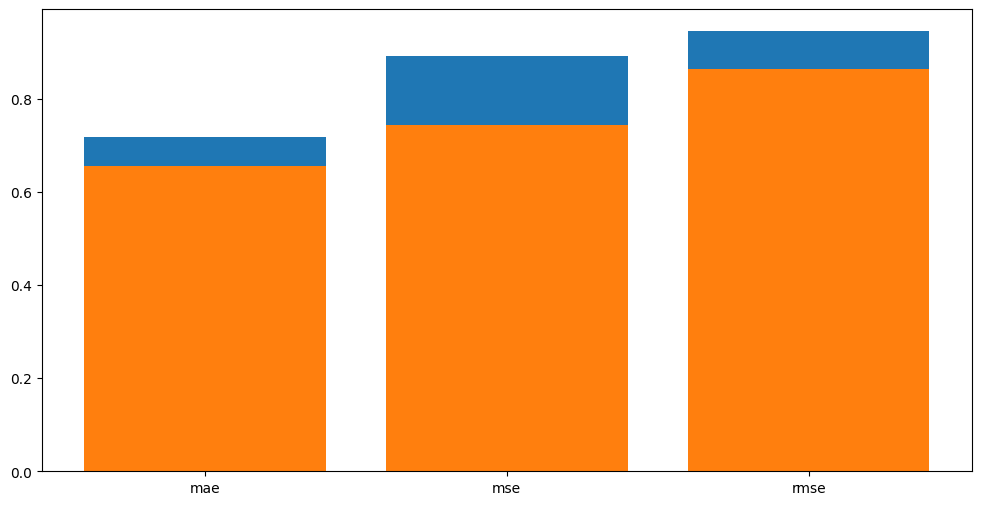

In [20]:
mae = [mae_knnb, mae_knnm] #, mae_knnbl, mae_knnz]
mse = [mse_knnb, mse_knnm] #, mse_knnbl, mse_knnz]
rmse = [rmse_knnb, rmse_knnm] #, rmse_knnbl, rmse_knnz]
metrics = [mae, mse, rmse]
fig = plt.figure(figsize=(12,6))

plt.bar(['mae', 'mse', 'rmse'], [mae[0], mse[0], rmse[0]])
plt.bar(['mae', 'mse', 'rmse'], [mae[1], mse[1], rmse[1]])

#### with plotly

In [43]:
metrics_knnb = [mae_knnb, mse_knnb, rmse_knnb]
metrics_knnm = [mae_knnm, mse_knnm, rmse_knnm]
metrics_knnbl = [mae_knnbl, mse_knnbl, rmse_knnbl]
metrics_knnz = [mae_knnz, mse_knnz, rmse_knnz]

fig = go.Figure()

fig.add_trace(go.Bar(x = ['mae', 'mse', 'rmse'], y = metrics_knnb, name = 'knn basic', marker_color = 'lightgreen', orientation='v'))
fig.add_trace(go.Bar(x = ['mae', 'mse', 'rmse'], y = metrics_knnm, name = 'knn with means', marker_color = 'mediumturquoise', orientation='v')) 
fig.add_trace(go.Bar(x = ['mae', 'mse', 'rmse'], y = metrics_knnbl, name = 'knn baseline', orientation='v')) 
fig.add_trace(go.Bar(x = ['mae', 'mse', 'rmse'], y = metrics_knnz, name = 'knn with z-score', orientation='v')) 

fig.update_layout(title = 'Performance metrics for knn-models', title_x = 0.5, xaxis_title = 'Metric') # Title and axis titles
fig.update_layout(autosize=False, width=800, height=400) # Figure size
#fig.update_yaxes(range = [0.6,1])
fig.show()

### Comparison with whole dataset?

In [1]:
# import os

# from surprise import BaselineOnly, Dataset, Reader
# from surprise.model_selection import cross_validate

# # path to dataset file
# file_path = '../data/raw/ml-25m/ratings.csv'

# # As we're loading a custom dataset, we need to define a reader. In the movielens-25M dataset, each line has the following format:
# # 'user item rating timestamp', separated by ',' characters.
# # the rating scale differs from the default which is (1,5)
# # the first line of the csv-file holds the column labels and has to be skipped
# reader = Reader(line_format="user item rating timestamp", sep=",", rating_scale=(0.5,5.0), skip_lines=1)

# data_raw = Dataset.load_from_file(file_path, reader=reader)

# # We can now use this dataset as we please, e.g. calling cross_validate
# cross_validate(BaselineOnly(), data_raw, verbose=True)

Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8598  0.8605  0.8596  0.8597  0.8594  0.8598  0.0004  
MAE (testset)     0.6563  0.6567  0.6561  0.6562  0.6559  0.6563  0.0003  
Fit time          13.61   14.10   12.73   14.41   12.83   13.54   0.67    
Test time         32.08   31.78   35.06   32.93   32.52   32.87   1.16    


{'test_rmse': array([0.85980001, 0.8604538 , 0.85962623, 0.85966432, 0.85943012]),
 'test_mae': array([0.65625061, 0.65673368, 0.65611308, 0.6562477 , 0.65591931]),
 'fit_time': (13.608110666275024,
  14.100187301635742,
  12.733914613723755,
  14.410256147384644,
  12.83238434791565),
 'test_time': (32.07837247848511,
  31.775968551635742,
  35.05826759338379,
  32.92880654335022,
  32.518630266189575)}

### Example general process

In [15]:
# Step 1: Data Preparation
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load the data into Surprise format, sort columns in order raw user id, raw item id, rating
# reader = Reader(rating_scale=(0.5, 5.0))
# data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Step 2: Training the Model
from surprise import KNNWithMeans

# Using KNN with means for item-based collaborative filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Compute similarities between items
}

algo = KNNWithMeans(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Step 3: Generating Predictions
predictions = algo.test(testset)

# Step 4: Calculating MAE
from surprise import accuracy

# Calculate MAE
mae = accuracy.mae(predictions, verbose=True)
mse = accuracy.mse(predictions, verbose=True)
rmse = accuracy.rmse(predictions, verbose=True)
#fcp = accuracy.fcp(predictions, verbose=True)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Square Error (MSE): {mse:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
#print(f"Fraction of Concordant Pairs (FCP): {fcp:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.6560
Mean Absolute Error (MAE): 0.6559659619299026


### Cross-validation

In [25]:
# We can now use this dataset as we please, e.g. calling cross_validate
print(cross_validate(KNNWithMeans(sim_options=sim_options), data, verbose=True))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8612  0.8619  0.8621  0.8635  0.8636  0.8624  0.0009  
MAE (testset)     0.6531  0.6541  0.6539  0.6550  0.6549  0.6542  0.0007  
Fit time          59.80   62.52   60.56   61.86   62.21   61.39   1.04    
Test time         114.31  111.47  112.56  116.20  116.51  114.21  1.97    
{'test_rmse': array([0.86116486, 0.86190431, 0.86207547, 0.86353446, 0.86355266]), 'test_mae': array([0.65311526, 0.65409545, 0.65392462, 0.65502981, 0.65485074]), 'fit_time': (59.80

In [27]:
# We can now use this dataset as we please, e.g. calling cross_validate
sim_options = {
    'name': 'cosine',
    'user_based': False  # Compute similarities between items
}
cv_knnb = cross_validate(KNNBasic(sim_options=sim_options), data, verbose=True)
print(cv_knnb)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9446  0.9451  0.9446  0.9457  0.9440  0.9448  0.0006  
MAE (testset)     0.7178  0.7181  0.7178  0.7184  0.7173  0.7179  0.0004  
Fit time          60.15   60.94   60.86   60.74   60.35   60.61   0.31    
Test time         107.58  108.92  106.22  107.40  108.25  107.67  0.90    
{'test_rmse': array([0.94460723, 0.94506173, 0.94460162, 0.94567242, 0.94396863]), 'test_mae': array([0.71784157, 0.71808259, 0.71782377, 0.71841161, 0.71730852]), 'fit_time': (60.147638

In [38]:
print('Element 0 of dict:', cv_knnb['test_rmse'][0])
print('RSME mean:', cv_knnb['test_rmse'].mean())

Element 0 of dict: 0.9446072271341195
RSME mean: 0.9447823243994385


In [24]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8711  0.8717  0.8722  0.8735  0.8722  0.8722  0.0008  
MAE (testset)     0.6680  0.6678  0.6683  0.6695  0.6685  0.6684  0.0006  
Fit time          13.80   14.68   14.82   15.27   14.72   14.66   0.48    
Test time         8.49    5.71    7.94    7.95    7.91    7.60    0.97    


{'test_rmse': array([0.87109061, 0.87174423, 0.87221979, 0.87353911, 0.87220833]),
 'test_mae': array([0.667955  , 0.66778051, 0.66834774, 0.66954866, 0.66851245]),
 'fit_time': (13.79632043838501,
  14.67921757698059,
  14.823809146881104,
  15.265122652053833,
  14.715065717697144),
 'test_time': (8.492265939712524,
  5.707574367523193,
  7.942520618438721,
  7.946498394012451,
  7.908499240875244)}

### Train on a whole trainset and the predict() method

In [19]:
from surprise import KNNBasic

# Retrieve the trainset.
trainset_full = data.build_full_trainset()

# Build an algorithm, and train it.
sim_options_full = {
    'name': 'cosine',
    'user_based': False  # Compute similarities between items
}
algo_full = KNNBasic(sim_options=sim_options_full)
algo_full.fit(trainset_full)

uid = str(74244)  # raw user id (as in the ratings file). They are **strings**!
iid = str(1)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items. r_ui represents the true, known rating.
pred = algo_full.predict(uid, iid, r_ui=4, verbose=True)

# Note: The predict() uses raw ids. As the dataset we have used has been read from a file, the raw ids are strings (even if they represent numbers).

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 74244      item: 1          r_ui = 4.00   est = 3.47   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [21]:
uid = str(124114)  # raw user id (as in the ratings file). They are **strings**!
iid = str(542)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items. r_ui represents the true, known rating.
pred = algo_full.predict(uid, iid, r_ui=4, verbose=True)

user: 124114     item: 542        r_ui = 4.00   est = 3.47   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [17]:
predictions.

[Prediction(uid=26746, iid=70286, r_ui=4.0, est=3.3372547969244026, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid=124114, iid=542, r_ui=2.0, est=2.869563721033683, details={'actual_k': 29, 'was_impossible': False}),
 Prediction(uid=141598, iid=69844, r_ui=4.0, est=3.9901629366236504, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=149555, iid=88, r_ui=3.0, est=3.406322234316517, details={'actual_k': 23, 'was_impossible': False}),
 Prediction(uid=107294, iid=319, r_ui=5.0, est=4.070038909860552, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=109995, iid=477, r_ui=4.0, est=3.865748086923187, details={'actual_k': 13, 'was_impossible': False}),
 Prediction(uid=145419, iid=3507, r_ui=4.0, est=4.636028992555722, details={'actual_k': 21, 'was_impossible': False}),
 Prediction(uid=97401, iid=164, r_ui=2.0, est=4.203599499898937, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=109885, iid=2403, r_ui=4.0, est=3.334